In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
import warnings
warnings.filterwarnings("ignore")
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# invoking SimpleImputer to fill missing values

In [2]:
cv = pd.read_csv("../input/covid19-weekly-trends-in-europe-latest-data/covid_europe_weekly_trend.csv")
cv.head()

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Albania,6462,3003,115,2249,16,30,-47,6,2873032
1,Andorra,2668,2010,33,34447,1,1,0,13,77452
2,Austria,43106,17868,141,4745,97,116,-16,11,9084308
3,Belarus,7420,8038,-8,786,107,112,-4,11,9444609
4,Belgium,117335,58779,100,10058,138,198,-30,12,11666099


In [3]:
cv.isna().sum()

Country/Other                       0
Cases in the last 7 days            0
Cases in the preceding 7 days       0
Weekly Case % Change                0
Cases in the last 7 days/1M pop     0
Deaths in the last 7 days           0
Deaths in the preceding 7 days      0
Weekly Death % Change               0
Deaths in the last 7 days/1M pop    0
Population                          0
dtype: int64

In [4]:
cv.shape

(47, 10)

In [5]:
cv.describe()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
count,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01
mean,1.424700e+05,1.006313e+05,57.574468,11438.914894,418.659574,462.021277,17.638298,26.872340,1.592157e+07
std,3.238080e+05,2.304024e+05,54.697884,9348.401609,948.128323,1078.587472,83.434542,23.220696,2.817411e+07
min,3.040000e+02,2.160000e+02,-25.000000,665.000000,0.000000,0.000000,-50.000000,0.000000,3.367600e+04
25%,6.525000e+03,4.410000e+03,26.000000,3448.000000,17.500000,23.500000,-24.000000,11.000000,9.846470e+05
50%,2.654200e+04,1.396900e+04,49.000000,8412.000000,76.000000,112.000000,-8.000000,18.000000,5.485502e+06
75%,1.176940e+05,8.380200e+04,68.000000,18455.500000,297.500000,371.500000,18.500000,39.000000,1.054247e+07
max,1.538652e+06,1.044832e+06,251.000000,34447.000000,5744.000000,6591.000000,400.000000,101.000000,1.460294e+08


In [6]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country/Other                     47 non-null     object
 1   Cases in the last 7 days          47 non-null     int64 
 2   Cases in the preceding 7 days     47 non-null     int64 
 3   Weekly Case % Change              47 non-null     int64 
 4   Cases in the last 7 days/1M pop   47 non-null     int64 
 5   Deaths in the last 7 days         47 non-null     int64 
 6   Deaths in the preceding 7 days    47 non-null     int64 
 7   Weekly Death % Change             47 non-null     int64 
 8   Deaths in the last 7 days/1M pop  47 non-null     int64 
 9   Population                        47 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 3.8+ KB


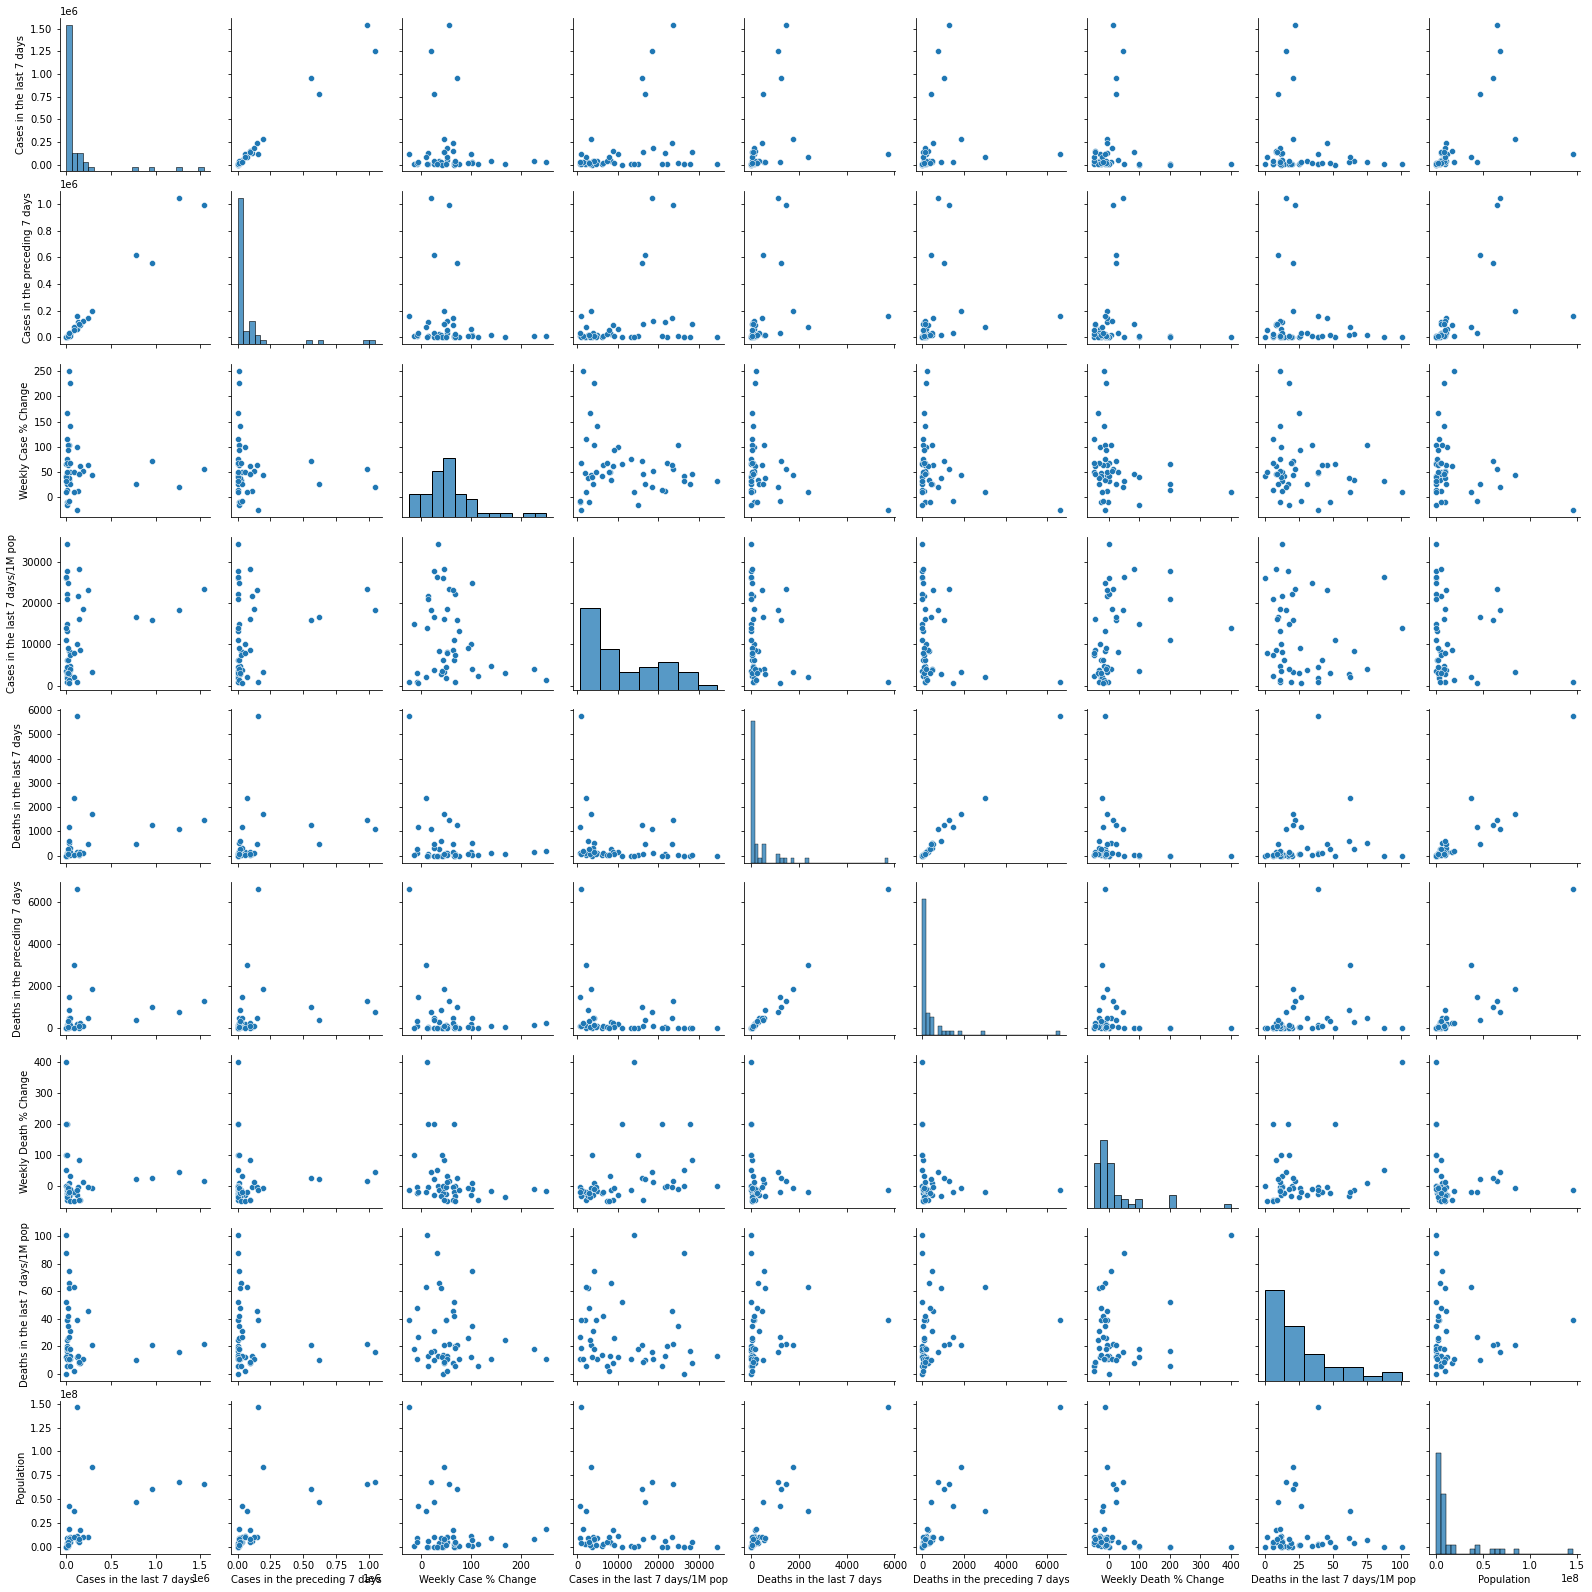

In [7]:
sns.pairplot(cv)

In [8]:
corr = cv.corr()

In [9]:
corr

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
Cases in the last 7 days,1.000000,0.987429,-0.085188,0.261904,0.292635,0.190488,-0.011764,-0.138699,0.559030
Cases in the preceding 7 days,0.987429,1.000000,-0.130434,0.249081,0.326010,0.225332,-0.005487,-0.135620,0.589882
Weekly Case % Change,-0.085188,-0.130434,1.000000,-0.187790,-0.280084,-0.284835,-0.251342,-0.176901,-0.222058
Cases in the last 7 days/1M pop,0.261904,0.249081,-0.187790,1.000000,-0.225508,-0.266473,0.328710,-0.110930,-0.153839
Deaths in the last 7 days,0.292635,0.326010,-0.280084,-0.225508,1.000000,0.992401,-0.124302,0.163835,0.912008
Deaths in the preceding 7 days,0.190488,0.225332,-0.284835,-0.266473,0.992401,1.000000,-0.141683,0.184879,0.867323
Weekly Death % Change,-0.011764,-0.005487,-0.251342,0.328710,-0.124302,-0.141683,1.000000,0.328698,-0.129722
Deaths in the last 7 days/1M pop,-0.138699,-0.135620,-0.176901,-0.110930,0.163835,0.184879,0.328698,1.000000,-0.016992
Population,0.559030,0.589882,-0.222058,-0.153839,0.912008,0.867323,-0.129722,-0.016992,1.000000


<AxesSubplot:>

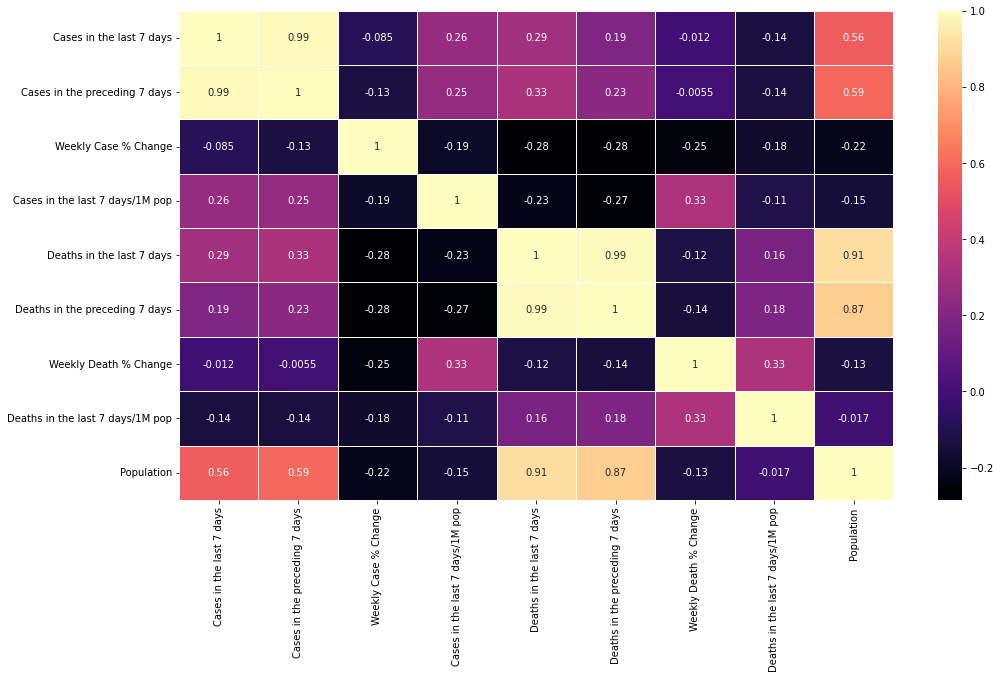

In [10]:
f, ax = plt.subplots(figsize=(16,9))
sns.heatmap(corr, annot=True, lw=.5, cmap="magma")

# Cases in the Last 7 Days

In [11]:
cv[["Cases in the last 7 days","Country/Other"]].groupby(["Country/Other"], as_index=False).mean().sort_values("Cases in the last 7 days")

,Country/Other,Cases in the last 7 days
21,Isle of Man,304.0
24,Liechtenstein,422.0
29,Monaco,553.0
16,Gibraltar,882.0
38,San Marino,893.0
12,Faeroe Islands,1091.0
1,Andorra,2668.0
28,Moldova,3417.0
7,Channel Islands,4902.0
5,Bosnia and Herzegovina,6020.0


<AxesSubplot:xlabel='Country/Other'>

<Figure size 1152x648 with 0 Axes>

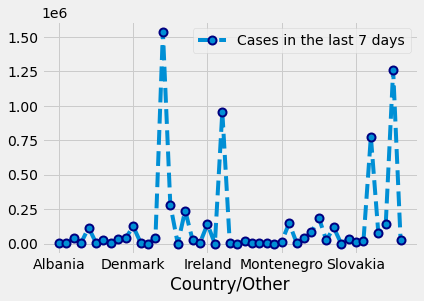

In [12]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,9))
cv[["Cases in the last 7 days","Country/Other"]].groupby(["Country/Other"]).mean().plot(marker="o", lw=4, ls="--", mew=2, mec="navy", ms=8)

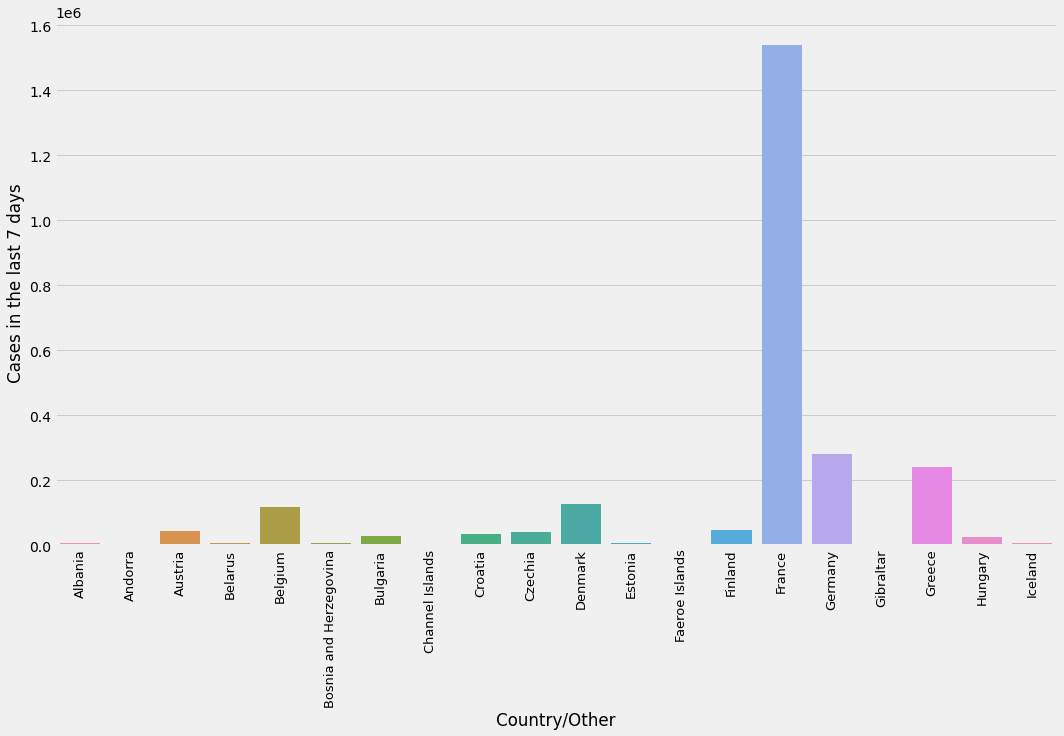

In [13]:
cvlast7 = cv[["Cases in the last 7 days","Country/Other"]].groupby(["Country/Other"], as_index=False).mean()
plt.figure(figsize=(16,9))
sns.barplot("Country/Other", "Cases in the last 7 days", data=cvlast7.head(20))
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

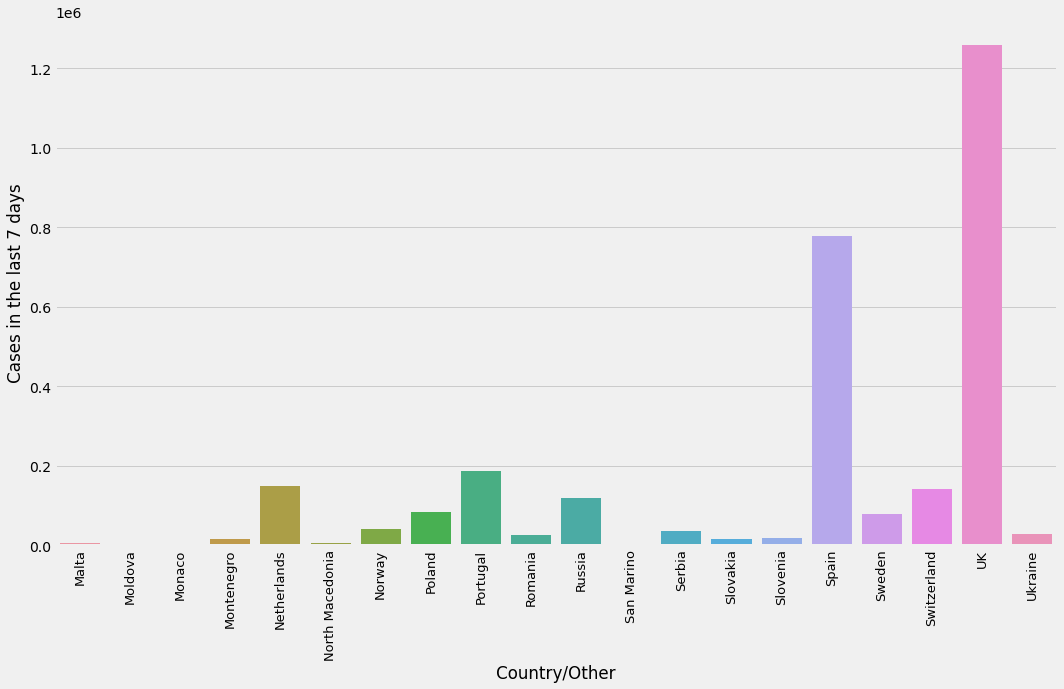

In [14]:
cvlast7 = cv[["Cases in the last 7 days","Country/Other"]].groupby(["Country/Other"], as_index=False).mean()
plt.figure(figsize=(16,9))
sns.barplot("Country/Other", "Cases in the last 7 days", data=cvlast7.tail(20))
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

UK and France have the highest cases 

# Cases in the Preceding 7 days

In [15]:
cv[["Country/Other","Cases in the preceding 7 days","Population"]].groupby(["Country/Other"], as_index=False).sum().sort_values("Cases in the preceding 7 days", ascending=False)

,Country/Other,Cases in the preceding 7 days,Population
45,UK,1044832,68426678
14,France,989040,65492529
42,Spain,616275,46782241
22,Italy,558008,60326993
15,Germany,194220,84190162
37,Russia,156629,146029357
17,Greece,146610,10345834
35,Portugal,123609,10151618
10,Denmark,111527,5823130
44,Switzerland,97344,8750570


Text(0.5, 1.0, 'Covid Weekly Trends in Europe in Relation to Population')

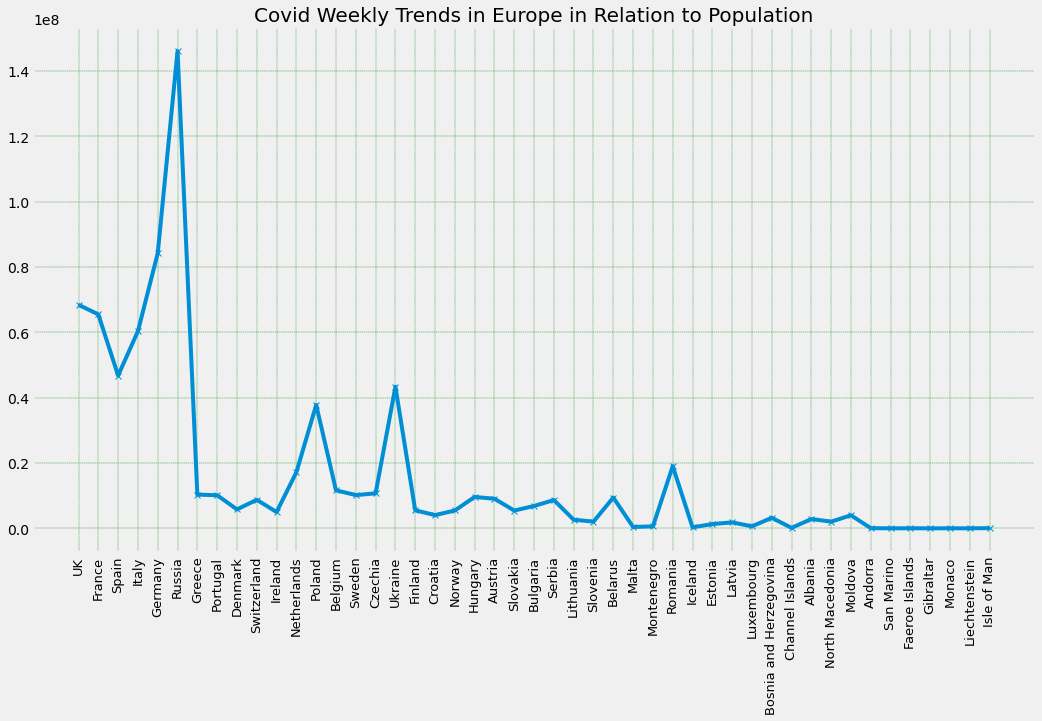

In [16]:
cvpre7 = cv[["Country/Other","Cases in the preceding 7 days","Population"]].groupby(["Country/Other"], as_index=False).sum().sort_values("Cases in the preceding 7 days", ascending=False)
plt.figure(figsize=(16,9))
plt.plot(cvpre7["Country/Other"], cvpre7.Population, marker="x")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls="--", lw=.4)
plt.title("Covid Weekly Trends in Europe in Relation to Population", c="black", fontsize=20)

Text(0.5, 1.0, 'Covid Weekly Trends in Europe')

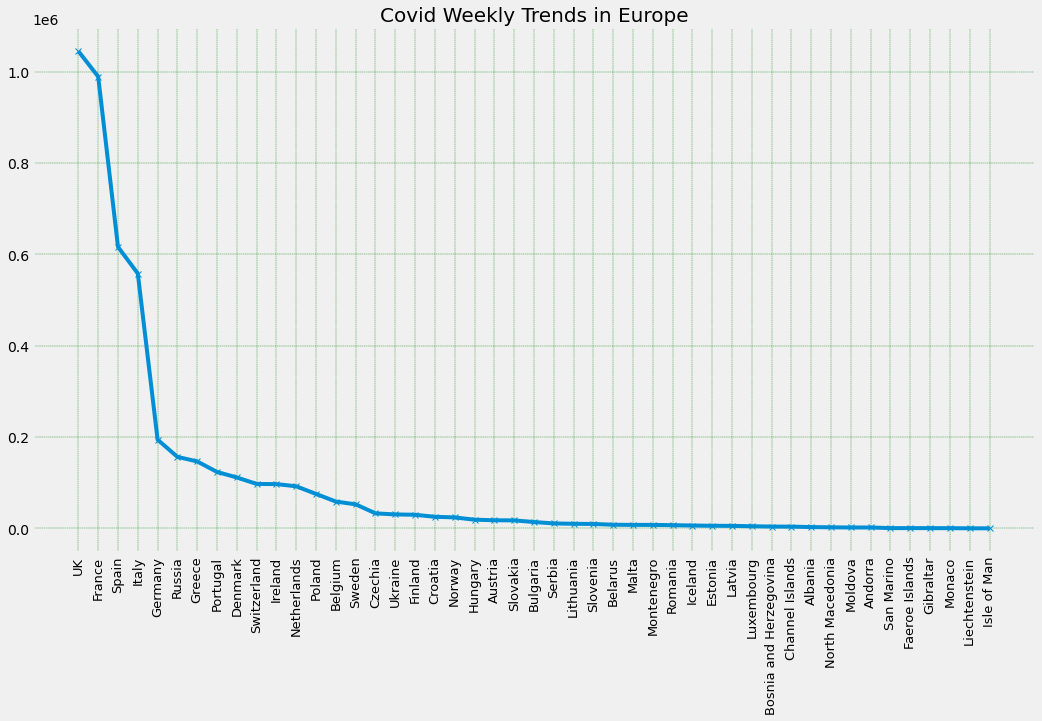

In [17]:
plt.figure(figsize=(16,9))
plt.plot(cvpre7["Country/Other"], cvpre7["Cases in the preceding 7 days"], marker="x")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls="--", lw=.4)
plt.title("Covid Weekly Trends in Europe", c="black", fontsize=20)

Text(0.5, 1.0, 'Covid Weekly Trends in Europe')

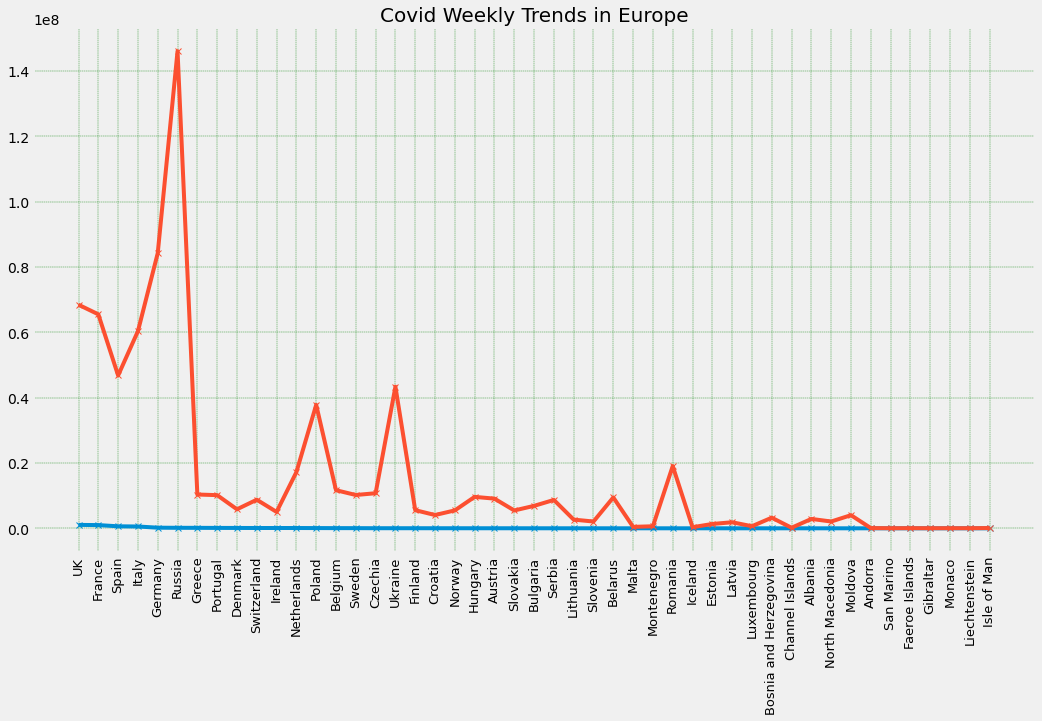

In [18]:
plt.figure(figsize=(16,9))
plt.plot(cvpre7["Country/Other"], cvpre7["Cases in the preceding 7 days"], marker="x")
plt.plot(cvpre7["Country/Other"], cvpre7.Population, marker="x")
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.grid(c="g", ls="--", lw=.4)
plt.title("Covid Weekly Trends in Europe", c="black", fontsize=20)

# Weekly Case % Change
* Let us study case density

<AxesSubplot:xlabel='Weekly Case % Change', ylabel='Density'>

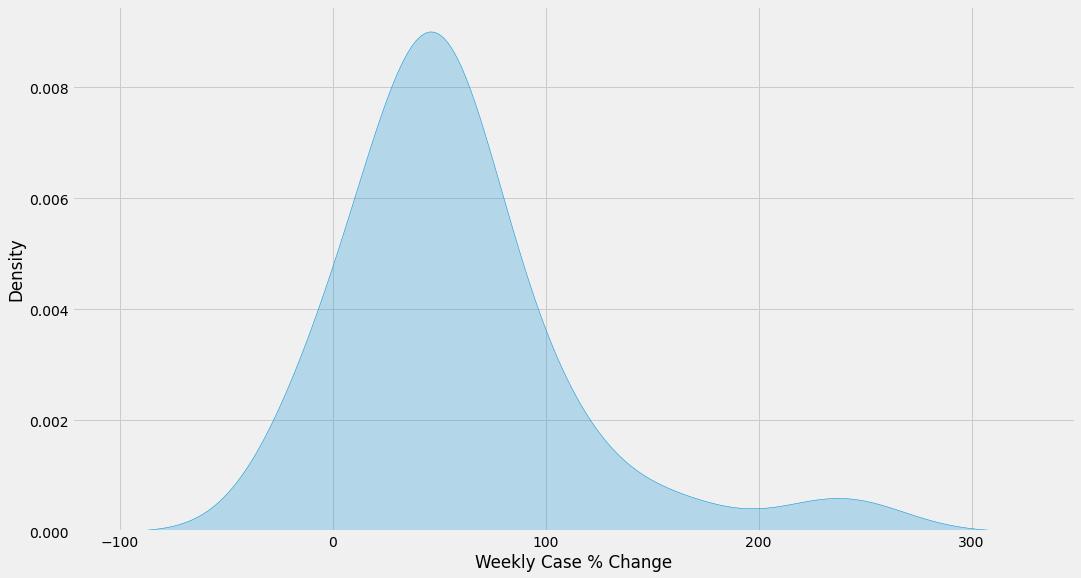

In [19]:
plt.figure(figsize=(16,9))
sns.kdeplot(x=cv["Weekly Case % Change"], shade=True)

Text(0.5, 1.0, 'Weekly % Change Across All Countries')

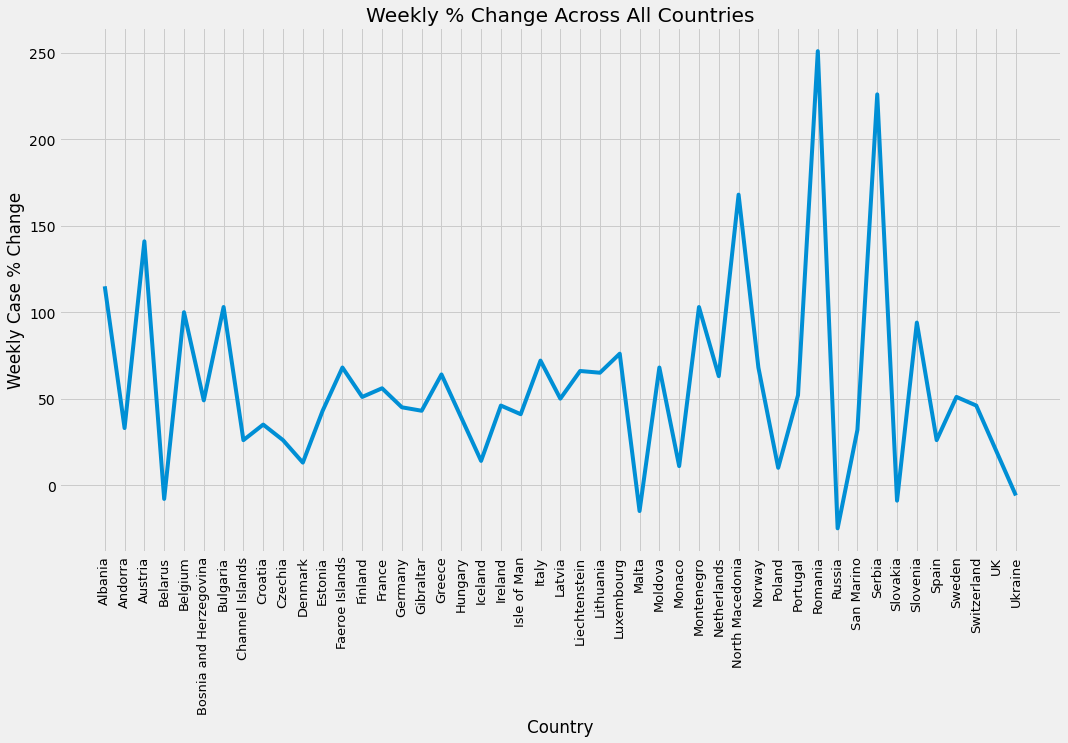

In [20]:
plt.figure(figsize=(16,9))
sns.lineplot(x="Country/Other", y="Weekly Case % Change", data=cv)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.xlabel("Country")
plt.title("Weekly % Change Across All Countries")

# Cases in the last 7 days/1M pop

Text(0.5, 1.0, 'Cases in the Last 7 Days/1M Population')

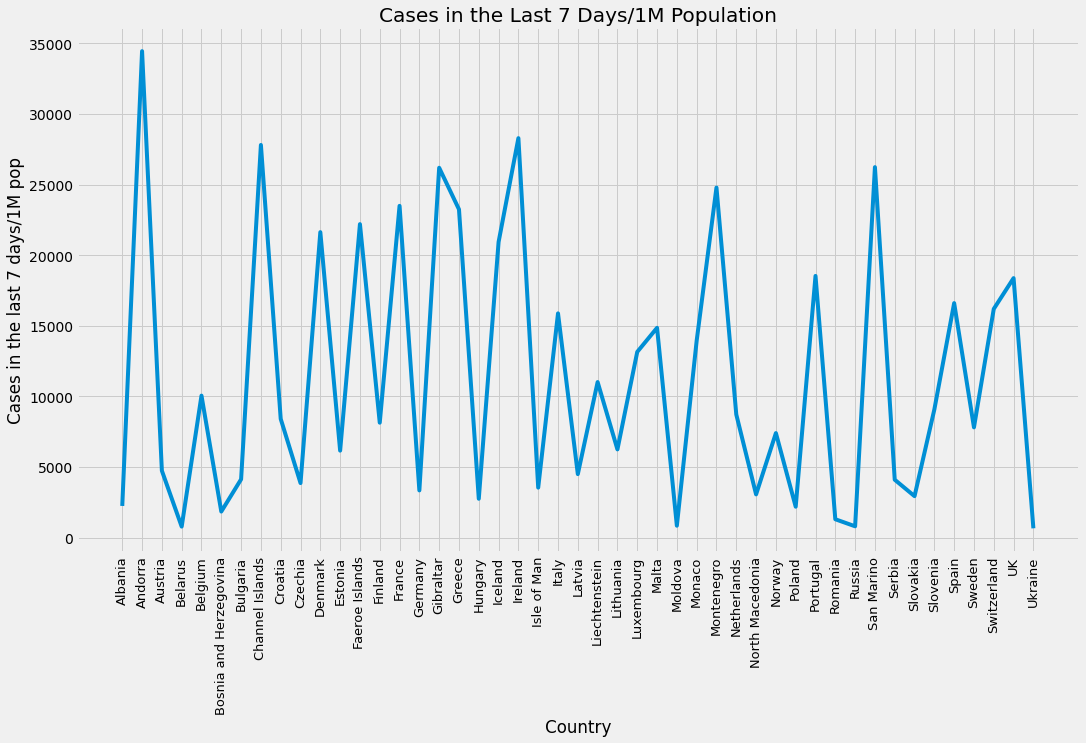

In [21]:
plt.figure(figsize=(16,9))
sns.lineplot(x="Country/Other", y="Cases in the last 7 days/1M pop", data=cv)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.xlabel("Country")
plt.title("Cases in the Last 7 Days/1M Population")

* Let us plot the density

<AxesSubplot:xlabel='Cases in the last 7 days/1M pop', ylabel='Density'>

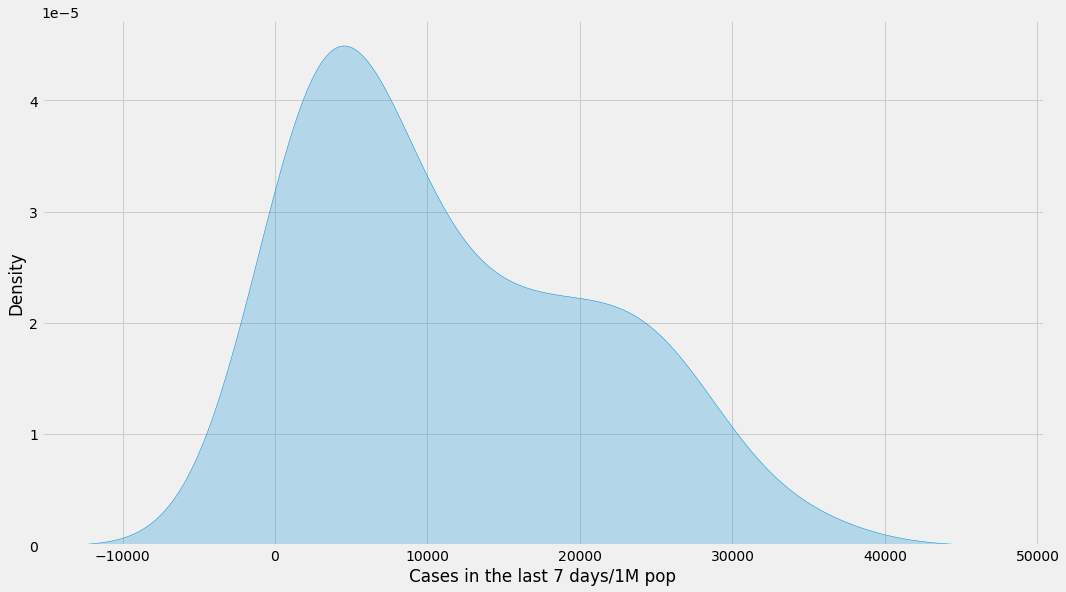

In [22]:
plt.figure(figsize=(16,9))
sns.kdeplot(x=cv["Cases in the last 7 days/1M pop"], shade=True)

# Deaths in the last 7 days

In [23]:
cv[["Country/Other","Deaths in the last 7 days","Population"]].groupby(["Country/Other"], as_index=False).sum().sort_values("Deaths in the last 7 days", ascending=False)

,Country/Other,Deaths in the last 7 days,Population
37,Russia,5744,146029357
34,Poland,2374,37783748
15,Germany,1735,84190162
14,France,1465,65492529
22,Italy,1266,60326993
46,Ukraine,1189,43335243
45,UK,1120,68426678
18,Hungary,594,9623149
6,Bulgaria,516,6869106
42,Spain,487,46782241


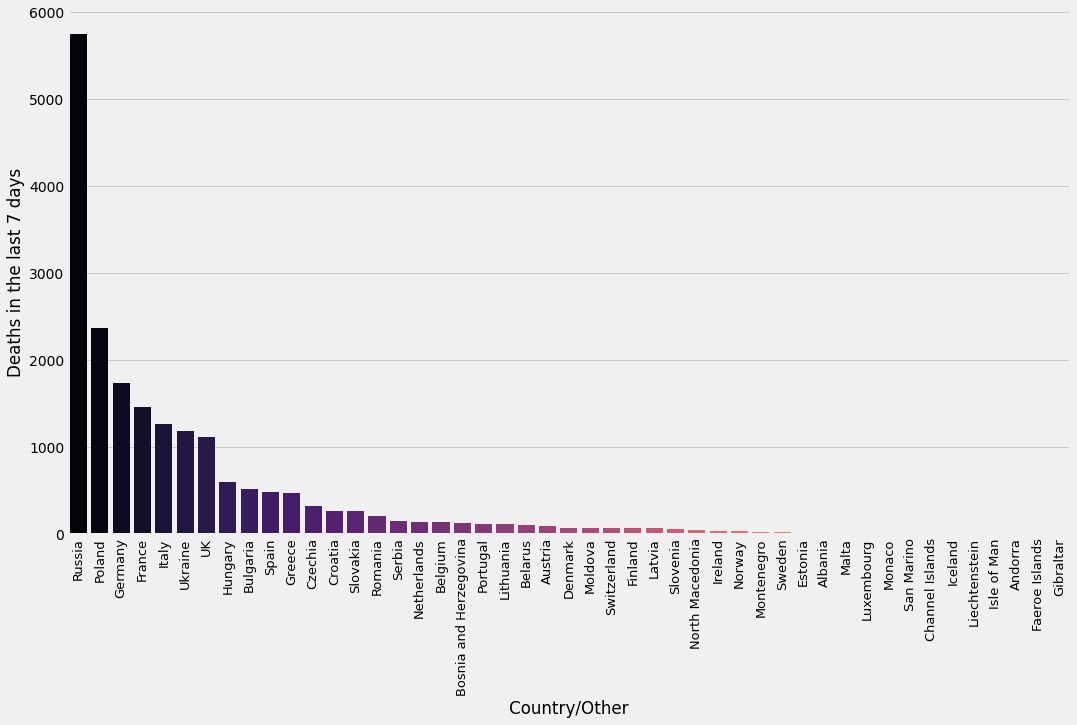

In [24]:
# Top 10 Nation with deaths
cvde7 = cv[["Country/Other","Deaths in the last 7 days","Population"]].groupby(["Country/Other"], as_index=False).sum().sort_values("Deaths in the last 7 days", ascending=False)
plt.figure(figsize=(16,9))
sns.barplot(x="Country/Other", y="Deaths in the last 7 days", palette="magma", data=cvde7)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

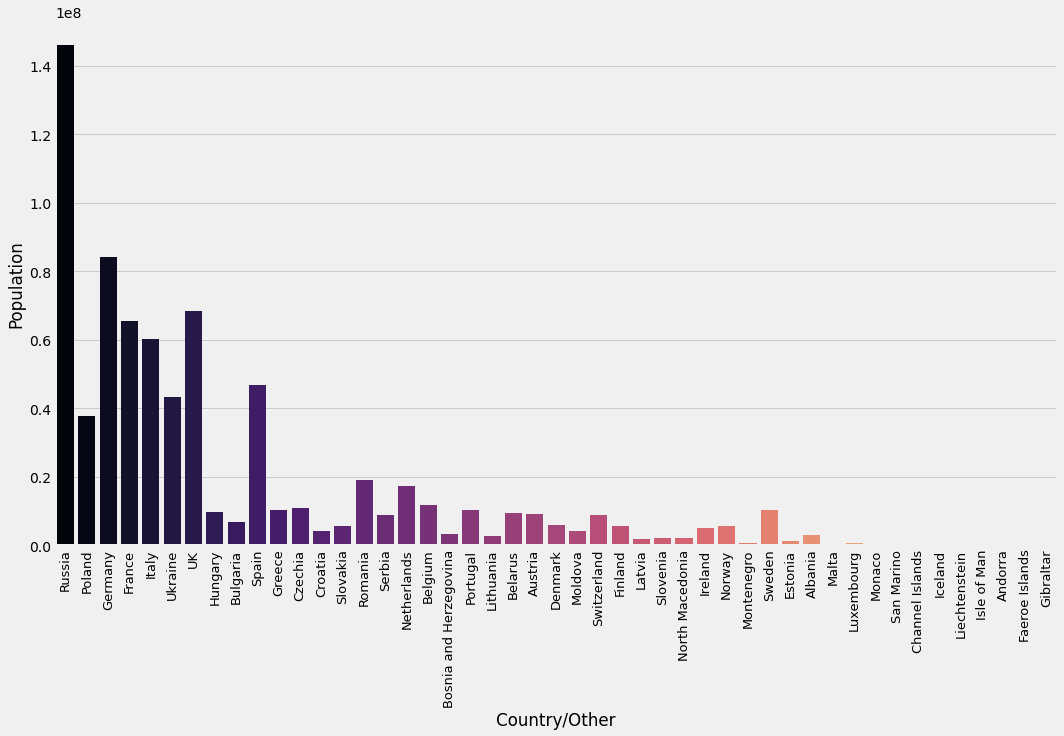

In [25]:
plt.figure(figsize=(16,9))
sns.barplot(x="Country/Other", y="Population", palette="magma", data=cvde7)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

* Coincidentally, Russia also has the highest population

# Deaths in the Preceding 7 days

In [26]:
cv[["Country/Other","Deaths in the preceding 7 days","Population"]].groupby(["Country/Other"], as_index=False).sum().sort_values("Deaths in the preceding 7 days", ascending=False)

,Country/Other,Deaths in the preceding 7 days,Population
37,Russia,6591,146029357
34,Poland,3012,37783748
15,Germany,1848,84190162
46,Ukraine,1467,43335243
14,France,1279,65492529
22,Italy,1023,60326993
18,Hungary,879,9623149
45,UK,767,68426678
17,Greece,498,10345834
6,Bulgaria,479,6869106


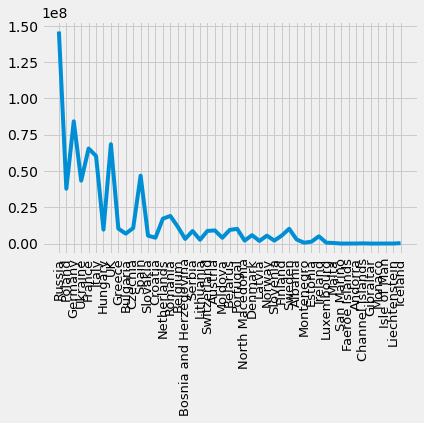

In [27]:
cvpre7 = cv[["Country/Other","Deaths in the preceding 7 days","Population"]].groupby(["Country/Other"], as_index=False).sum().sort_values("Deaths in the preceding 7 days", ascending=False)
plt.plot(cvpre7["Country/Other"], cvpre7.Population)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

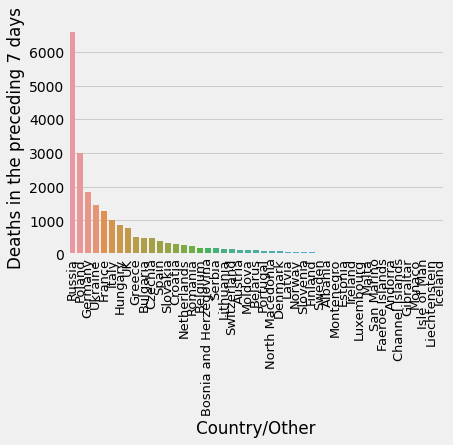

In [28]:
sns.barplot(cvpre7["Country/Other"], cvpre7["Deaths in the preceding 7 days"])
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)

# Weekly Death % Change
* Let us look at the density

<AxesSubplot:xlabel='Weekly Death % Change', ylabel='Density'>

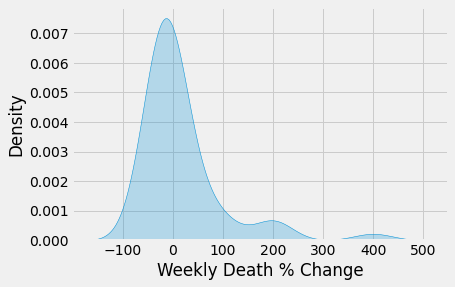

In [29]:
sns.kdeplot(x=cv["Weekly Death % Change"], shade=True)

# Deaths in the last 7 days/1M pop

<AxesSubplot:xlabel='Country/Other'>

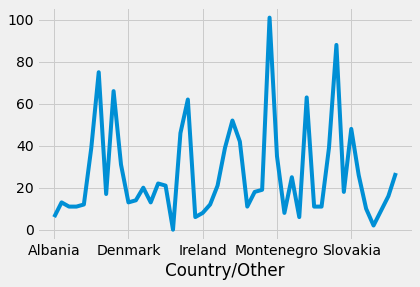

In [30]:
cv.groupby("Country/Other")["Deaths in the last 7 days/1M pop"].sum().plot()

# Population

In [31]:
cv.groupby("Country/Other")["Population"].sum().to_frame().reset_index().sort_values("Population", ascending=False)

,Country/Other,Population
37,Russia,146029357
15,Germany,84190162
45,UK,68426678
14,France,65492529
22,Italy,60326993
42,Spain,46782241
46,Ukraine,43335243
34,Poland,37783748
36,Romania,19043039
31,Netherlands,17192363


In [32]:
pop = cv.groupby("Country/Other")["Population"].sum().to_frame().reset_index().sort_values("Population", ascending=False)

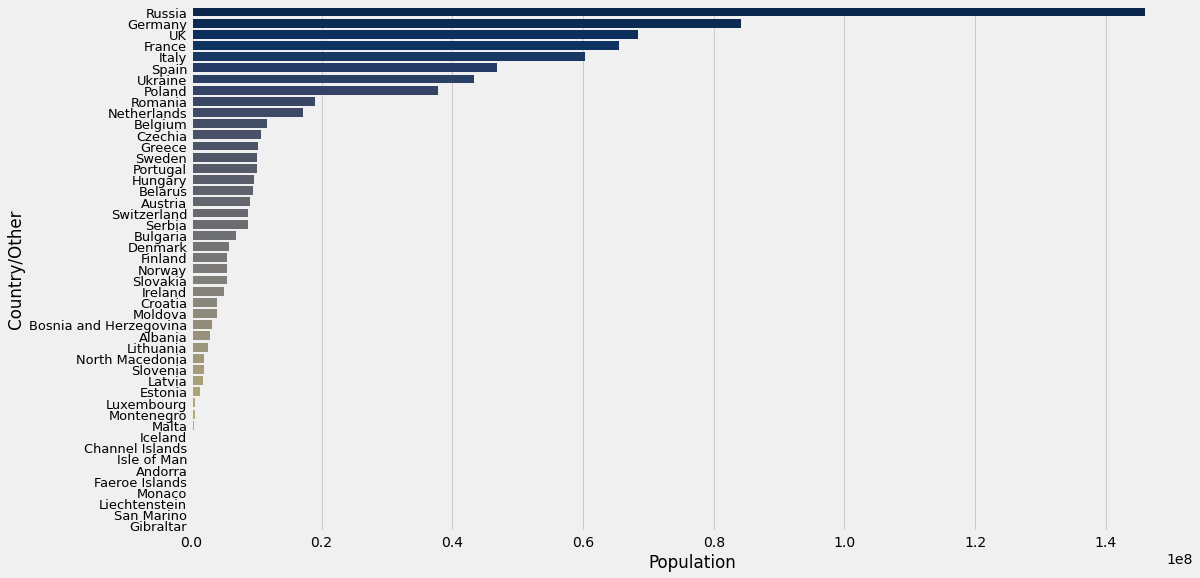

In [33]:
f,ax=plt.subplots(figsize=(16,9))
sns.barplot(pop.Population, pop["Country/Other"], palette="cividis")
plt.tick_params(axis="y", which="major", labelsize=13)

 # Any feedback will be appreciated :-)